# FIN 7821 Assignment1

In [1]:
import pandas as pd
import numpy as np

## Question 1

In [107]:
#read dataset as df
df = pd.read_csv("NCES_CCD_extract.csv")

In [108]:
column_names = df.columns.tolist()
print(column_names)

['Agency Name', 'State Name [District] Latest available year', 'State Abbr [District] Latest available year', 'Agency ID - NCES Assigned [District] Latest available year', 'Hispanic Students [District] 2019-20', 'Hispanic Students [District] 2018-19', 'Hispanic Students [District] 2017-18', 'Hispanic Students [District] 2016-17', 'Hispanic Students [District] 2015-16', 'Hispanic Students [District] 2014-15', 'Black or African American Students [District] 2019-20', 'Black or African American Students [District] 2018-19', 'Black or African American Students [District] 2017-18', 'Black or African American Students [District] 2016-17', 'Black or African American Students [District] 2015-16', 'Black or African American Students [District] 2014-15', 'White Students [District] 2019-20', 'White Students [District] 2018-19', 'White Students [District] 2017-18', 'White Students [District] 2016-17', 'White Students [District] 2015-16', 'White Students [District] 2014-15', 'Fall Membership (V33) [

- Rename the variables to have sensible names

In [109]:
# Rename for easy use
df1 = df.rename(columns={'State Name [District] Latest available year':'distname', 'State Abbr [District] Latest available year':'stname', 'State Abbr [District] Latest available year': 'stabbr', \
                         'Agency ID - NCES Assigned [District] Latest available year':'distid', 'Hispanic Students [District] 2019-20':'hisp2019', \
                          'Hispanic Students [District] 2018-19':'hisp2018','Hispanic Students [District] 2017-18':'hisp2017', \
                        'Hispanic Students [District] 2016-17':'hisp2016', 'Hispanic Students [District] 2015-16':'hisp2015', \
                          'Hispanic Students [District] 2014-15':'hisp2014', 'Black or African American Students [District] 2019-20':'black2019', \
                        'Black or African American Students [District] 2018-19':'black2018', 'Black or African American Students [District] 2017-18':'black2017',\
                        'Black or African American Students [District] 2016-17':'black2016', 'Black or African American Students [District] 2015-16':'black2015', 
                        'Black or African American Students [District] 2014-15':'black2014',  'White Students [District] 2019-20':'white2019', \
                         'White Students [District] 2018-19':'white2018', 'White Students [District] 2017-18':'white2017', \
                        'White Students [District] 2016-17':'white2016', 'White Students [District] 2015-16':'white2015', \
                        'White Students [District] 2014-15':'white2014', 'Fall Membership (V33) [District Finance] 2017-18': 'mem2017', \
                        'Fall Membership (V33) [District Finance] 2016-17': 'mem2016', 'Fall Membership (V33) [District Finance] 2015-16': 'mem2015', \
                        'Fall Membership (V33) [District Finance] 2014-15': 'mem2014', 'Total General Revenue (TOTALREV) [District Finance] 2017-18':'totrev2017',\
                        'Total General Revenue (TOTALREV) [District Finance] 2016-17':'totrev2016', 'Total General Revenue (TOTALREV) [District Finance] 2015-16':'totrev2015', \
                        'Total General Revenue (TOTALREV) [District Finance] 2014-15':'totrev2014', 'Total Expenditures (TOTALEXP) [District Finance] 2017-18':'totexp2017', \
                        'Total Expenditures (TOTALEXP) [District Finance] 2016-17':'totexp2016', 'Total Expenditures (TOTALEXP) [District Finance] 2015-16':'totexp2015', \
                        'Total Expenditures (TOTALEXP) [District Finance] 2014-15':'totexp2014'})



In [110]:
df1_column_names = df1.columns.tolist()
print(df1_column_names)

['Agency Name', 'distname', 'stabbr', 'distid', 'hisp2019', 'hisp2018', 'hisp2017', 'hisp2016', 'hisp2015', 'hisp2014', 'black2019', 'black2018', 'black2017', 'black2016', 'black2015', 'black2014', 'white2019', 'white2018', 'white2017', 'white2016', 'white2015', 'white2014', 'mem2017', 'mem2016', 'mem2015', 'mem2014', 'totrev2017', 'totrev2016', 'totrev2015', 'totrev2014', 'totexp2017', 'totexp2016', 'totexp2015', 'totexp2014']


- Destring the variables that should be numeric

In [111]:
# Destring the variables that should be numeric
numeric_columns = ['distid','hisp2019', 'hisp2018', 'hisp2017', 'hisp2016', 'hisp2015', 'hisp2014',
                   'black2019', 'black2018', 'black2017', 'black2016', 'black2015', 'black2014',
                   'white2019', 'white2018', 'white2017', 'white2016', 'white2015', 'white2014',
                   'mem2017', 'mem2016', 'mem2015', 'mem2014',
                   'totrev2017', 'totrev2016', 'totrev2015', 'totrev2014',
                   'totexp2017', 'totexp2016', 'totexp2015', 'totexp2014']

# copy the dataframe to df2 for future convenience
df2 = df1.copy()
df2[numeric_columns] = df2[numeric_columns].apply(pd.to_numeric, errors='coerce')

# check data types for df2 after data type conversion conversion
pd.set_option('display.max_columns', None)

data_types = df2.dtypes
print(data_types)

Agency Name     object
distname        object
stabbr          object
distid         float64
hisp2019       float64
hisp2018       float64
hisp2017       float64
hisp2016       float64
hisp2015       float64
hisp2014       float64
black2019      float64
black2018      float64
black2017      float64
black2016      float64
black2015      float64
black2014      float64
white2019      float64
white2018      float64
white2017      float64
white2016      float64
white2015      float64
white2014      float64
mem2017        float64
mem2016        float64
mem2015        float64
mem2014        float64
totrev2017     float64
totrev2016     float64
totrev2015     float64
totrev2014     float64
totexp2017     float64
totexp2016     float64
totexp2015     float64
totexp2014     float64
dtype: object


- Drop the missing records in numerical cols

In [131]:
# Drop the missing records in numerical cols
missing_data = df2[numeric_columns].isna()
print(missing_data)
df3 = df2.dropna(subset=numeric_columns)

       distid  hisp2019  hisp2018  hisp2017  hisp2016  hisp2015  hisp2014   
0       False      True      True      True      True      True      True  \
1       False     False     False     False     False     False     False   
2       False     False     False     False     False     False     False   
3       False     False     False     False     False     False     False   
4        True     False     False     False     False     False     False   
...       ...       ...       ...       ...       ...       ...       ...   
20694   False      True      True      True      True      True      True   
20695    True      True      True      True      True      True      True   
20696    True      True      True      True      True      True      True   
20697    True      True      True      True      True      True      True   
20698    True      True      True      True      True      True      True   

       black2019  black2018  black2017  black2016  black2015  black2014   


- Reshape the data so the unit of observation is the district-year combination

In [132]:
def direct_year_conversion(df, col_to_convert):
    years = [col.split(col_to_convert)[1] for col in df.columns if col.startswith(col_to_convert)]

    split_records = []
    for year in years:
        year_column = f'{col_to_convert}{year}'
        records = pd.DataFrame({
            'Agency Name': df['Agency Name'],
            'distname': df['distname'],
            'stabbr': df['stabbr'],
            'distid': df['distid'],
            'year': int(year),
            col_to_convert: df[year_column]
        })
        split_records.append(records)

    df_result = pd.concat(split_records, ignore_index=True)
    return df_result


result_hisp = direct_year_conversion(df3, 'hisp')
result_black = direct_year_conversion(df3, 'black')
result_white = direct_year_conversion(df3, 'white')
result_mem = direct_year_conversion(df3, 'mem')
result_totrev = direct_year_conversion(df3, 'totrev')
result_totexp = direct_year_conversion(df3, 'totexp')

keys_list = ['Agency Name', 'distname', 'stabbr', 'distid', 'year']
df4 = pd.merge(result_hisp, result_black, on=keys_list, how='outer')
df4 = pd.merge(df4, result_white, on=keys_list, how='outer')
df4 = pd.merge(df4, result_mem, on=keys_list, how='outer')
df4 = pd.merge(df4, result_totrev, on=keys_list, how='outer')
df4 = pd.merge(df4, result_totexp, on=keys_list, how='outer')

In [133]:
num_observations, num_variables = df4.shape
print(f"Number of observations: {num_observations}")
print(f"Number of variables: {num_variables}")

Number of observations: 59370
Number of variables: 11


In [134]:
# Print out what des in stata have shown
def describe_data(data):
    num_observations, num_variables = data.shape

    variable_types = data.dtypes
    print(f"Observations: {num_observations}")
    print(f"Variables: {num_variables}")
    print("\nVariable Storage Display")
    print(f"name\ttype\tformat")

    for variable_name, variable_type in variable_types.items():
        variable_format = ''
        if variable_type == 'int64':
            variable_format = '%10.0g'
        elif variable_type == 'float64':
            variable_format = '%10.0g'
        elif variable_type == 'object':
            variable_format = f'%{max(len(variable_name), 9)}s'

        print(f"{variable_name}\t{variable_type}\t{variable_format}")

describe_data(df4)


Observations: 59370
Variables: 11

Variable Storage Display
name	type	format
Agency Name	object	%11s
distname	object	%9s
stabbr	object	%9s
distid	float64	%10.0g
year	int64	%10.0g
hisp	float64	%10.0g
black	float64	%10.0g
white	float64	%10.0g
mem	float64	%10.0g
totrev	float64	%10.0g
totexp	float64	%10.0g


In [135]:
df4[df4['year']==2015].head(5)

Agency Name      distname stabbr     distid  year   
39580         21ST CENTURY CYBER CS  Pennsylvania    PA   4200091.0  2015  \
39581  A W BROWN LEADERSHIP ACADEMY         Texas    TX   4800095.0  2015   
39582                    A+ ACADEMY         Texas    TX   4800203.0  2015   
39583               A+ ARTS ACADEMY          Ohio    OH   3900305.0  2015   
39584         A+ CHILDREN'S ACADEMY          Ohio    OH   3901480.0  2015   

        hisp   black  white     mem      totrev      totexp  
39580   49.0    63.0  670.0   818.0  10815000.0   9536000.0  
39581   63.0  2076.0    8.0  2161.0  20381000.0  15506000.0  
39582  863.0    30.0   31.0   940.0  11332000.0   9998000.0  
39583   26.0   625.0   10.0   692.0   6625000.0   6665000.0  
39584    3.0    38.0   73.0   133.0   1400000.0   1325000.0

## Question 2

- Per-pupil revenue and per-pupil expenditures

In [136]:
# Question 2 - Per-pupil revenue and per-pupil expenditures
df5 = df4.copy()
df5['pupil_per_rev'] = df4['totrev'] / df4['mem']
df5['pupil_per_exp'] = df4['totexp'] / df4['mem']


- Create log of per pupil revenues and expenditures by taking the log of each respective variable.

In [140]:
df6 = df5.copy()
df6['pupil_per_rev_log'] = np.log1p(df5['pupil_per_rev'])
df6['pupil_per_exp_log'] = np.log1p(df5['pupil_per_exp'])

Agency Name      distname stabbr     distid  year    hisp   
0         21ST CENTURY CYBER CS  Pennsylvania    PA   4200091.0  2019   103.0  \
1  A W BROWN LEADERSHIP ACADEMY         Texas    TX   4800095.0  2019    68.0   
2                    A+ ACADEMY         Texas    TX   4800203.0  2019  1304.0   
3               A+ ARTS ACADEMY          Ohio    OH   3900305.0  2019     3.0   
4         A+ CHILDREN'S ACADEMY          Ohio    OH   3901480.0  2019     4.0   

    black  white  mem  totrev  totexp  pupil_per_rev  pupil_per_exp   
0   135.0  920.0  NaN     NaN     NaN            NaN            NaN  \
1  1617.0    4.0  NaN     NaN     NaN            NaN            NaN   
2    46.0   35.0  NaN     NaN     NaN            NaN            NaN   
3   622.0    8.0  NaN     NaN     NaN            NaN            NaN   
4    44.0   44.0  NaN     NaN     NaN            NaN            NaN   

   pupil_per_rev_log  pupil_per_exp_log  
0                NaN                NaN  
1                NaN                NaN  
2                NaN                NaN  
3                NaN                NaN  
4                NaN                NaN

- Create the share of the student body that is either Black or Hispanic by adding Black and Hispanic enrollments together and dividing by total membership.

In [142]:
df7 = df6.copy()
df7['black_hisp_total'] = df7['black'] + df7['hisp']
df7['black_hisp_share'] = df7['black_hisp_total'] / df7['mem']

# Question 3

- Visualize the correlation between Black/Hispanic enrollment share and log of total revenues and log of total expenditures.

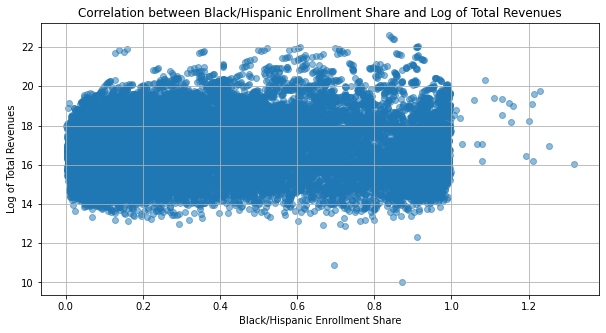

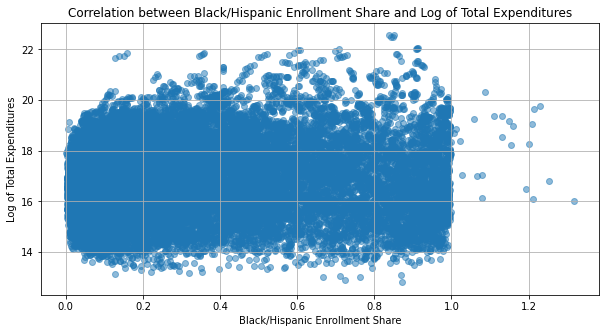

In [154]:
df8 = df7.copy()
df8['totrev_log'] = np.log1p(df8['totrev'])
df8['totexp_log'] = np.log1p(df8['totexp'])

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(df8['black_hisp_share'], df8['totrev_log'], alpha=0.5)
plt.title('Correlation between Black/Hispanic Enrollment Share and Log of Total Revenues')
plt.xlabel('Black/Hispanic Enrollment Share')
plt.ylabel('Log of Total Revenues')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(df8['black_hisp_share'], df8['totexp_log'], alpha=0.5)
plt.title('Correlation between Black/Hispanic Enrollment Share and Log of Total Expenditures')
plt.xlabel('Black/Hispanic Enrollment Share')
plt.ylabel('Log of Total Expenditures')
plt.grid(True)
plt.show()


# Question 4

In a single figure, plot both the average log of total per pupil revenue and log of total
per pupil expenditures against the share of Black/Hispanic student quantiles.

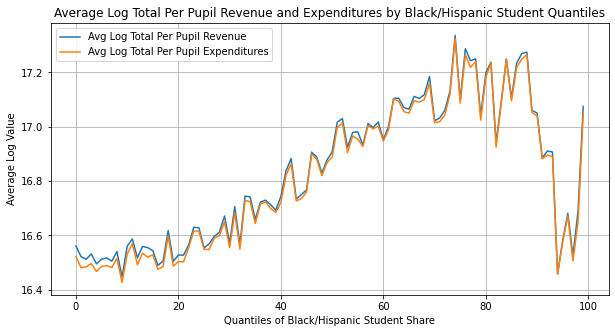

In [156]:
# Question 4 

df9=df8.copy()
df9['quantile'] = pd.qcut(df9['black_hisp_share'], q=100, labels=False)

quantile_stats = df9.groupby('quantile').agg({
    'totrev_log': 'mean',
    'totexp_log': 'mean'
}).reset_index()

import matplotlib.pyplot as plt
quantile_stats_array = quantile_stats.to_numpy()

plt.figure(figsize=(10, 5))
plt.plot(quantile_stats_array[:, 0], quantile_stats_array[:, 1], label='Avg Log Total Per Pupil Revenue')
plt.plot(quantile_stats_array[:, 0], quantile_stats_array[:, 2], label='Avg Log Total Per Pupil Expenditures')
plt.title('Average Log Total Per Pupil Revenue and Expenditures by Black/Hispanic Student Quantiles')
plt.xlabel('Quantiles of Black/Hispanic Student Share')
plt.ylabel('Average Log Value')
plt.legend()
plt.grid(True)
plt.show()

In a single figure, plot both the average log of total per pupil revenue and log of total
per pupil expenditures against the share of Black/Hispanic student quantiles. What
patterns emerge?

Answer: The per pupil expenditure has positive correlation with revenue, as the pupil revenue goes high, the expenditures goes up as well.

# Question 5

- Plot the state average total per-pupil expenditures against the state average Black/Hispanic enrollment share and label each point with the corresponding state two-letter abbreviation.

In [180]:
# Group the data by state (stabbr)
state_groups = df9.groupby('stabbr')

# Calculate the average Black/Hispanic share and per-pupil expenditures for each state
state_summary = state_groups.agg({
    'black': 'mean',
    'hisp': 'mean',
    'black_hisp_share':'mean',
    'pupil_per_exp': 'mean'
}).reset_index()

state_summary.head()

stabbr        black          hisp  black_hisp_share  pupil_per_exp
0    DC   1832.826923    493.448718          0.758782   26269.471453
1    DE   1087.900901    617.981982          0.469254   15404.021295
2    FL   9283.910448  13691.378109          0.382428   10569.113415
3    GA   3497.125683   1473.353370          0.431537   11374.751516
4    HI   3189.666667  24591.666667          0.143884   15281.662068

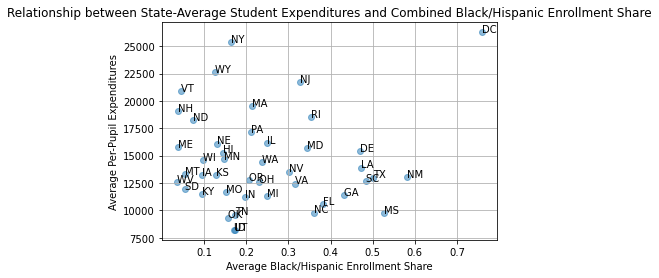

In [183]:
# Rename the columns if needed
state_summary.rename(columns={'black_hisp_share': 'Avg_black_hist_Share', 'pupil_per_exp': 'Avg_Per_Pupil_Exp'}, inplace=True)

# Plot the scatter plot with the x-axis as the combined avg Black/Hispanic share and the y-axis as the average per-pupil expenditures
plt.scatter(state_summary['Avg_black_hist_Share'], state_summary['Avg_Per_Pupil_Exp'], alpha=0.5)

# Add labels with two-letter state abbreviations
for i, txt in enumerate(state_summary['stabbr']):
    plt.annotate(txt, (state_summary['Avg_black_hist_Share'].iloc[i], state_summary['Avg_Per_Pupil_Exp'].iloc[i]))

# Add axis labels and a title
plt.xlabel('Average Black/Hispanic Enrollment Share')
plt.ylabel('Average Per-Pupil Expenditures')
plt.title('Relationship between State-Average Student Expenditures and Combined Black/Hispanic Enrollment Share')

# Display the plot
plt.grid(True)  


In [195]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import contextily as ctx 
import geopandas as gpd 
import os 
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [197]:
# Get stats
# Retrive the official shapefiles maps from the US Census Bureau 
# link: https://www.census.gov/cgi-bin/geo/shapefiles/index.php
path = "tl_2022_us_state/tl_2022_us_state.shp"
gdf = gpd.read_file(path)
gdf = gdf.to_crs("EPSG:4326")

In [203]:
gdf.head()

REGION DIVISION STATEFP   STATENS GEOID STUSPS           NAME LSAD  MTFCC   
0      3        5      54  01779805    54     WV  West Virginia   00  G4000  \
1      3        5      12  00294478    12     FL        Florida   00  G4000   
2      2        3      17  01779784    17     IL       Illinois   00  G4000   
3      2        4      27  00662849    27     MN      Minnesota   00  G4000   
4      3        5      24  01714934    24     MD       Maryland   00  G4000   

  FUNCSTAT         ALAND       AWATER     INTPTLAT      INTPTLON   
0        A   62266456923    489045863  +38.6472854  -080.6183274  \
1        A  138962819934  45971472526  +28.3989775  -082.5143005   
2        A  143778515726   6216539665  +40.1028754  -089.1526108   
3        A  206244837557  18937184315  +46.3159573  -094.1996043   
4        A   25151771744   6979295311  +38.9466584  -076.6744939   

                                            geometry  
0  POLYGON ((-77.75438 39.33346, -77.75422 39.333...  
1  MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ...  
2  POLYGON ((-87.89243 38.28285, -87.89334 38.282...  
3  POLYGON ((-95.31989 48.99892, -95.31747 48.998...  
4  POLYGON ((-75.75600 39.24607, -75.75579 39.243...

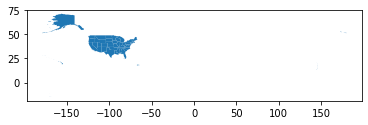

In [199]:
# basic plot
gdf.plot()

In [200]:
# removal of non_continetal states for better visualization
non_continental = ['HI','VI','MP','GU','AK','AS','PR']
us49 = gdf
for n in non_continental:
    us49 = us49[us49.STUSPS != n]

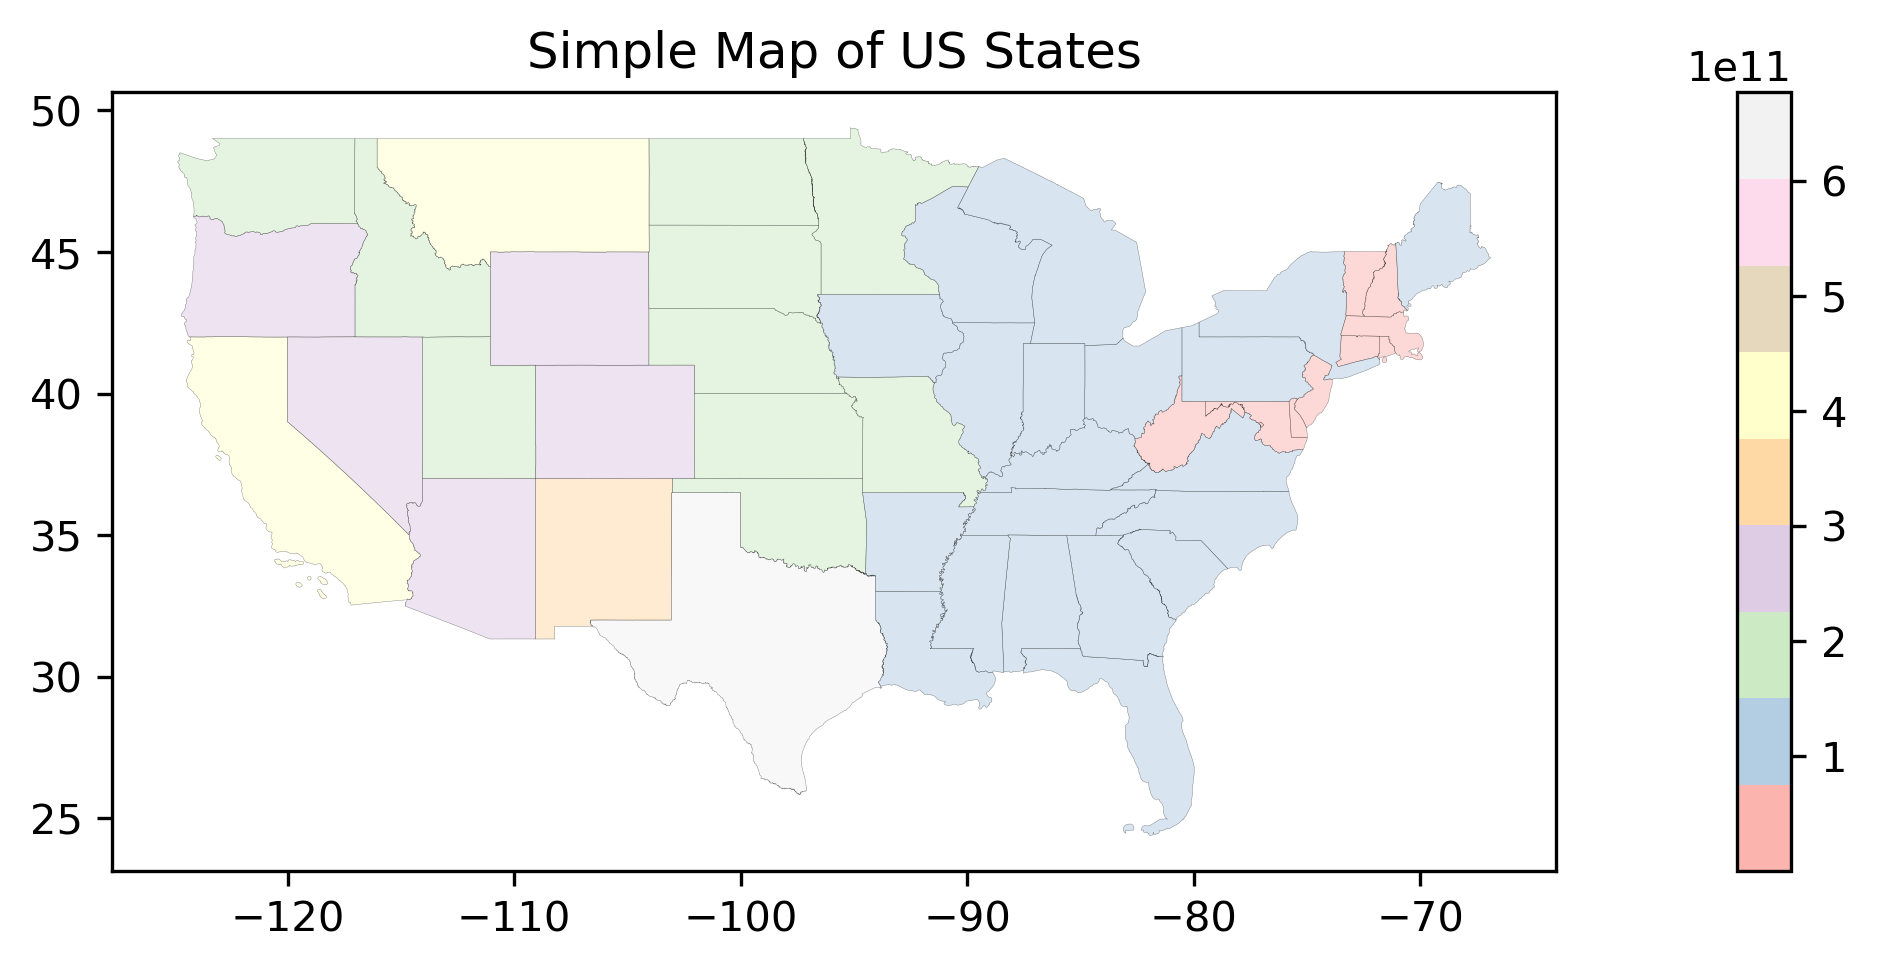

In [202]:
# Simple map for US States based on the downloaded file
f,ax = plt.subplots(1,1, figsize=(8,6), sharex=True, sharey=True, dpi=300)
plt.title('Simple Map of US States')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%",pad=0,alpha=0.5)
us49.plot('ALAND', ax=ax, alpha=0.5, cmap='Pastel1', edgecolor='k', legend=True, cax=cax, linewidth=0.1)
plt.show()

In [201]:
# Starting combine the data we have processed with the States data with geo information
# Checks for state_summary(done in previous questions)
state_summary.head()

stabbr        black          hisp  Avg_black_hist_Share  Avg_Per_Pupil_Exp
0    DC   1832.826923    493.448718              0.758782       26269.471453
1    DE   1087.900901    617.981982              0.469254       15404.021295
2    FL   9283.910448  13691.378109              0.382428       10569.113415
3    GA   3497.125683   1473.353370              0.431537       11374.751516
4    HI   3189.666667  24591.666667              0.143884       15281.662068

In [220]:
# Combine the data with geo information
import geopandas as gpd
import matplotlib.pyplot as plt

my_data = state_summary[['stabbr', 'Avg_black_hist_Share']]
merged = us49.merge(my_data, left_on='STUSPS', right_on='stabbr', how='inner')

# Filter out non-continental states
non_continental = ['HI', 'VI', 'MP', 'GU', 'AK', 'AS', 'PR']
merged = merged[~merged['STUSPS'].isin(non_continental)]

# Handle missing values in the specified column (e.g., 'Avg_black_hist_Share')
# Replace NaN values with a default value (e.g., 0)
column_to_plot = 'Avg_black_hist_Share'
default_value = 0

merged[column_to_plot].fillna(default_value, inplace=True)  # Replace NaN with the default value

plt.show()

In [217]:
data_types = my_data.dtypes
print(data_types)


stabbr                   object
Avg_black_hist_Share    float64
dtype: object


In [233]:
# Remove leading/trailing whitespaces and convert to uppercase
us49['STUSPS'] = us49['STUSPS'].str.strip().str.upper()
my_data['stabbr'] = my_data['stabbr'].str.strip().str.upper()

# Perform an inner join
df_join = us49.merge(my_data, left_on='STUSPS', right_on='stabbr', how='inner')
df_join.head()


<ipython-input-233-76840f0f62c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_data['stabbr'] = my_data['stabbr'].str.strip().str.upper()


REGION DIVISION STATEFP   STATENS GEOID STUSPS           NAME LSAD  MTFCC   
0      3        5      54  01779805    54     WV  West Virginia   00  G4000  \
1      3        5      12  00294478    12     FL        Florida   00  G4000   
2      2        3      17  01779784    17     IL       Illinois   00  G4000   
3      2        4      27  00662849    27     MN      Minnesota   00  G4000   
4      3        5      24  01714934    24     MD       Maryland   00  G4000   

  FUNCSTAT         ALAND       AWATER     INTPTLAT      INTPTLON   
0        A   62266456923    489045863  +38.6472854  -080.6183274  \
1        A  138962819934  45971472526  +28.3989775  -082.5143005   
2        A  143778515726   6216539665  +40.1028754  -089.1526108   
3        A  206244837557  18937184315  +46.3159573  -094.1996043   
4        A   25151771744   6979295311  +38.9466584  -076.6744939   

                                            geometry stabbr   
0  POLYGON ((-77.75438 39.33346, -77.75422 39.333...     WV  \
1  MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ...     FL   
2  POLYGON ((-87.89243 38.28285, -87.89334 38.282...     IL   
3  POLYGON ((-95.31989 48.99892, -95.31747 48.998...     MN   
4  POLYGON ((-75.75600 39.24607, -75.75579 39.243...     MD   

   Avg_black_hist_Share  
0              0.036465  
1              0.382428  
2              0.248599  
3              0.147139  
4              0.345190

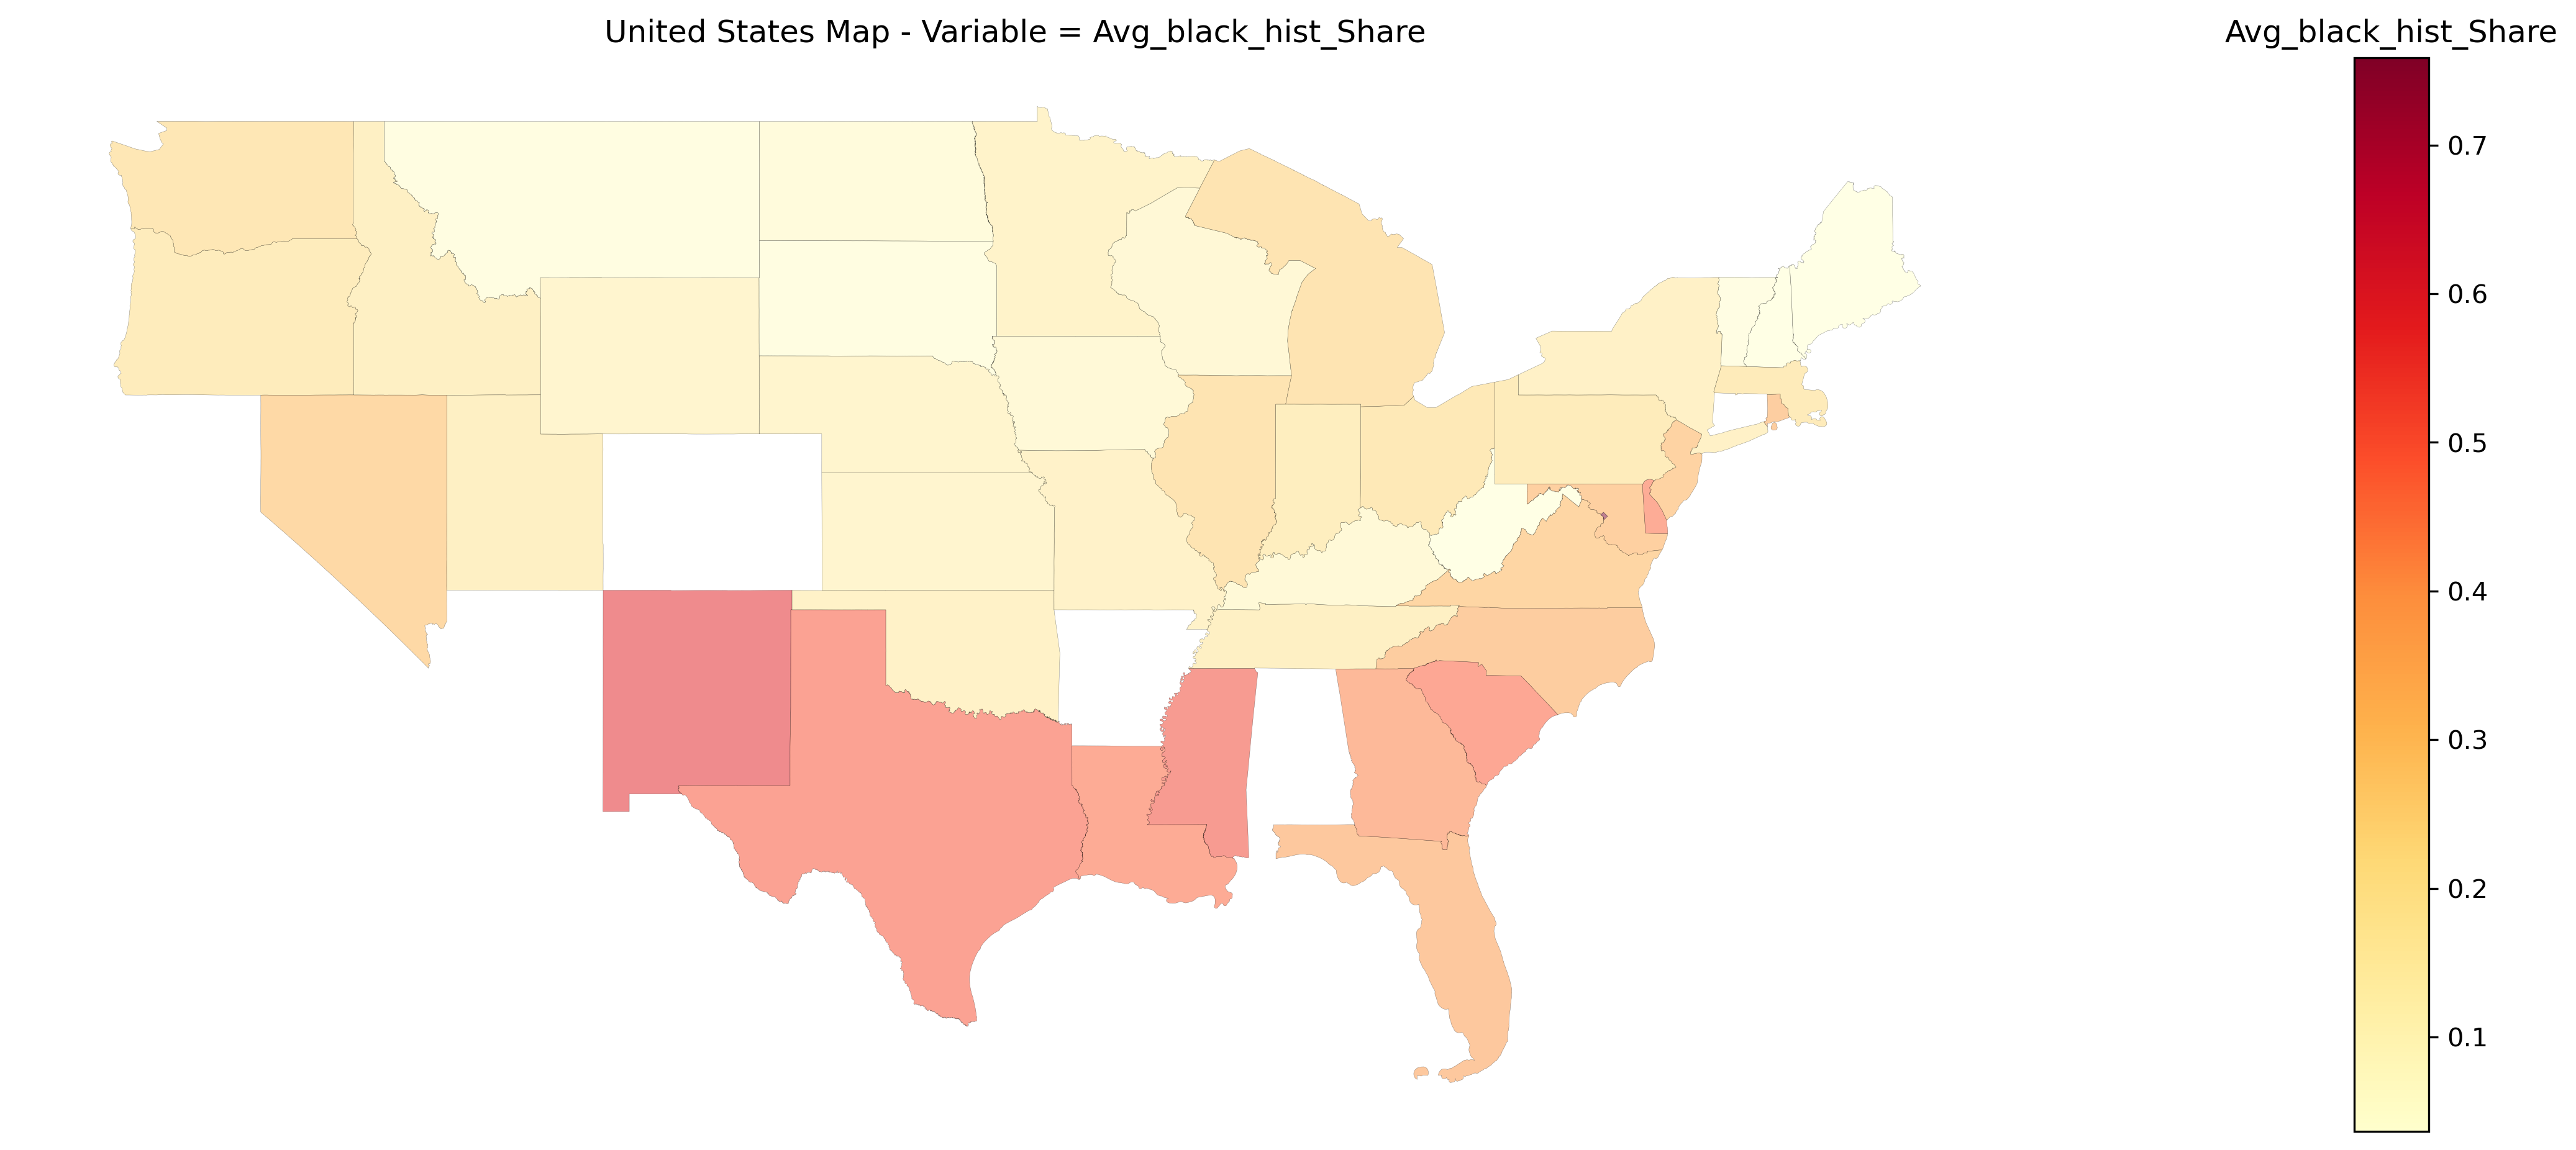

In [234]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

def StatesPlot(df, data, cmap):
    fig, ax = plt.subplots(1, 1, figsize=(15, 10), sharex=True, sharey=True, dpi=300)
    fig.tight_layout()
    plt.title('United States Map - Variable = ' + data)
    ax.set_axis_off()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3%", pad=0.5, alpha=0.5)
    
    # Plot the data using the specified colormap
    df.plot(data, ax=ax, alpha=0.5, cmap=cmap, edgecolor='k', legend=True, cax=cax, linewidth=0.1)
    
    # Customize the colorbar label and appearance
    cax.set_title(data, fontsize=12)
    
    plt.show()

# Example usage with df_join:
StatesPlot(df_join, 'Avg_black_hist_Share', 'YlOrRd')


# Question 6

- Example 1, using data from OpenNYC

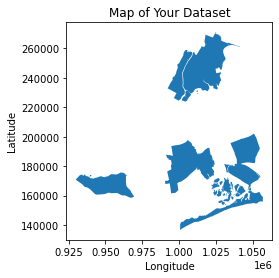

In [251]:
# Specify the name that is used to seach for the data
import geopandas as gpd
import matplotlib.pyplot as plt

shapefile_path = 'Green_Cart_Bnd_2008_DOHMH_2010/Green_Cart_Bnd_2008_DOHMH_2010.shp'

gdf_states_ny = gpd.read_file(shapefile_path)

# gdf_states_ny.head()
gdf_states_ny.plot()
plt.title('Map of Your Dataset')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [271]:
gdf_states_ny.head()

BOROCODE  COUNT_PREC  FIRST_BORO     FIRST_BO_1   
0         1           8           1      Manhattan  \
1         2          10           2      The Bronx   
2         3           9           3       Brooklyn   
3         4           4           4         Queens   
4         5           1           5  Staten Island   

                                       INCL_PREC   
0  23, 25, 26, 28, 30, 32, 33, 34\r\n33, and 34.  \
1             40, 41, 42, 44, 46, 47, 48, 49, 52   
2                 67, 70, 71, 73, 75, 77, 81, 83   
3                             100, 101, 103, 113   
4                                            120   

                                            geometry  
0  MULTIPOLYGON (((1007642.105 227756.197, 100742...  
1  MULTIPOLYGON (((1012821.806 229228.265, 101278...  
2  MULTIPOLYGON (((1027452.041 156400.814, 102683...  
3  MULTIPOLYGON (((1032066.245 153833.959, 103147...  
4  MULTIPOLYGON (((968962.134 160164.304, 969308....

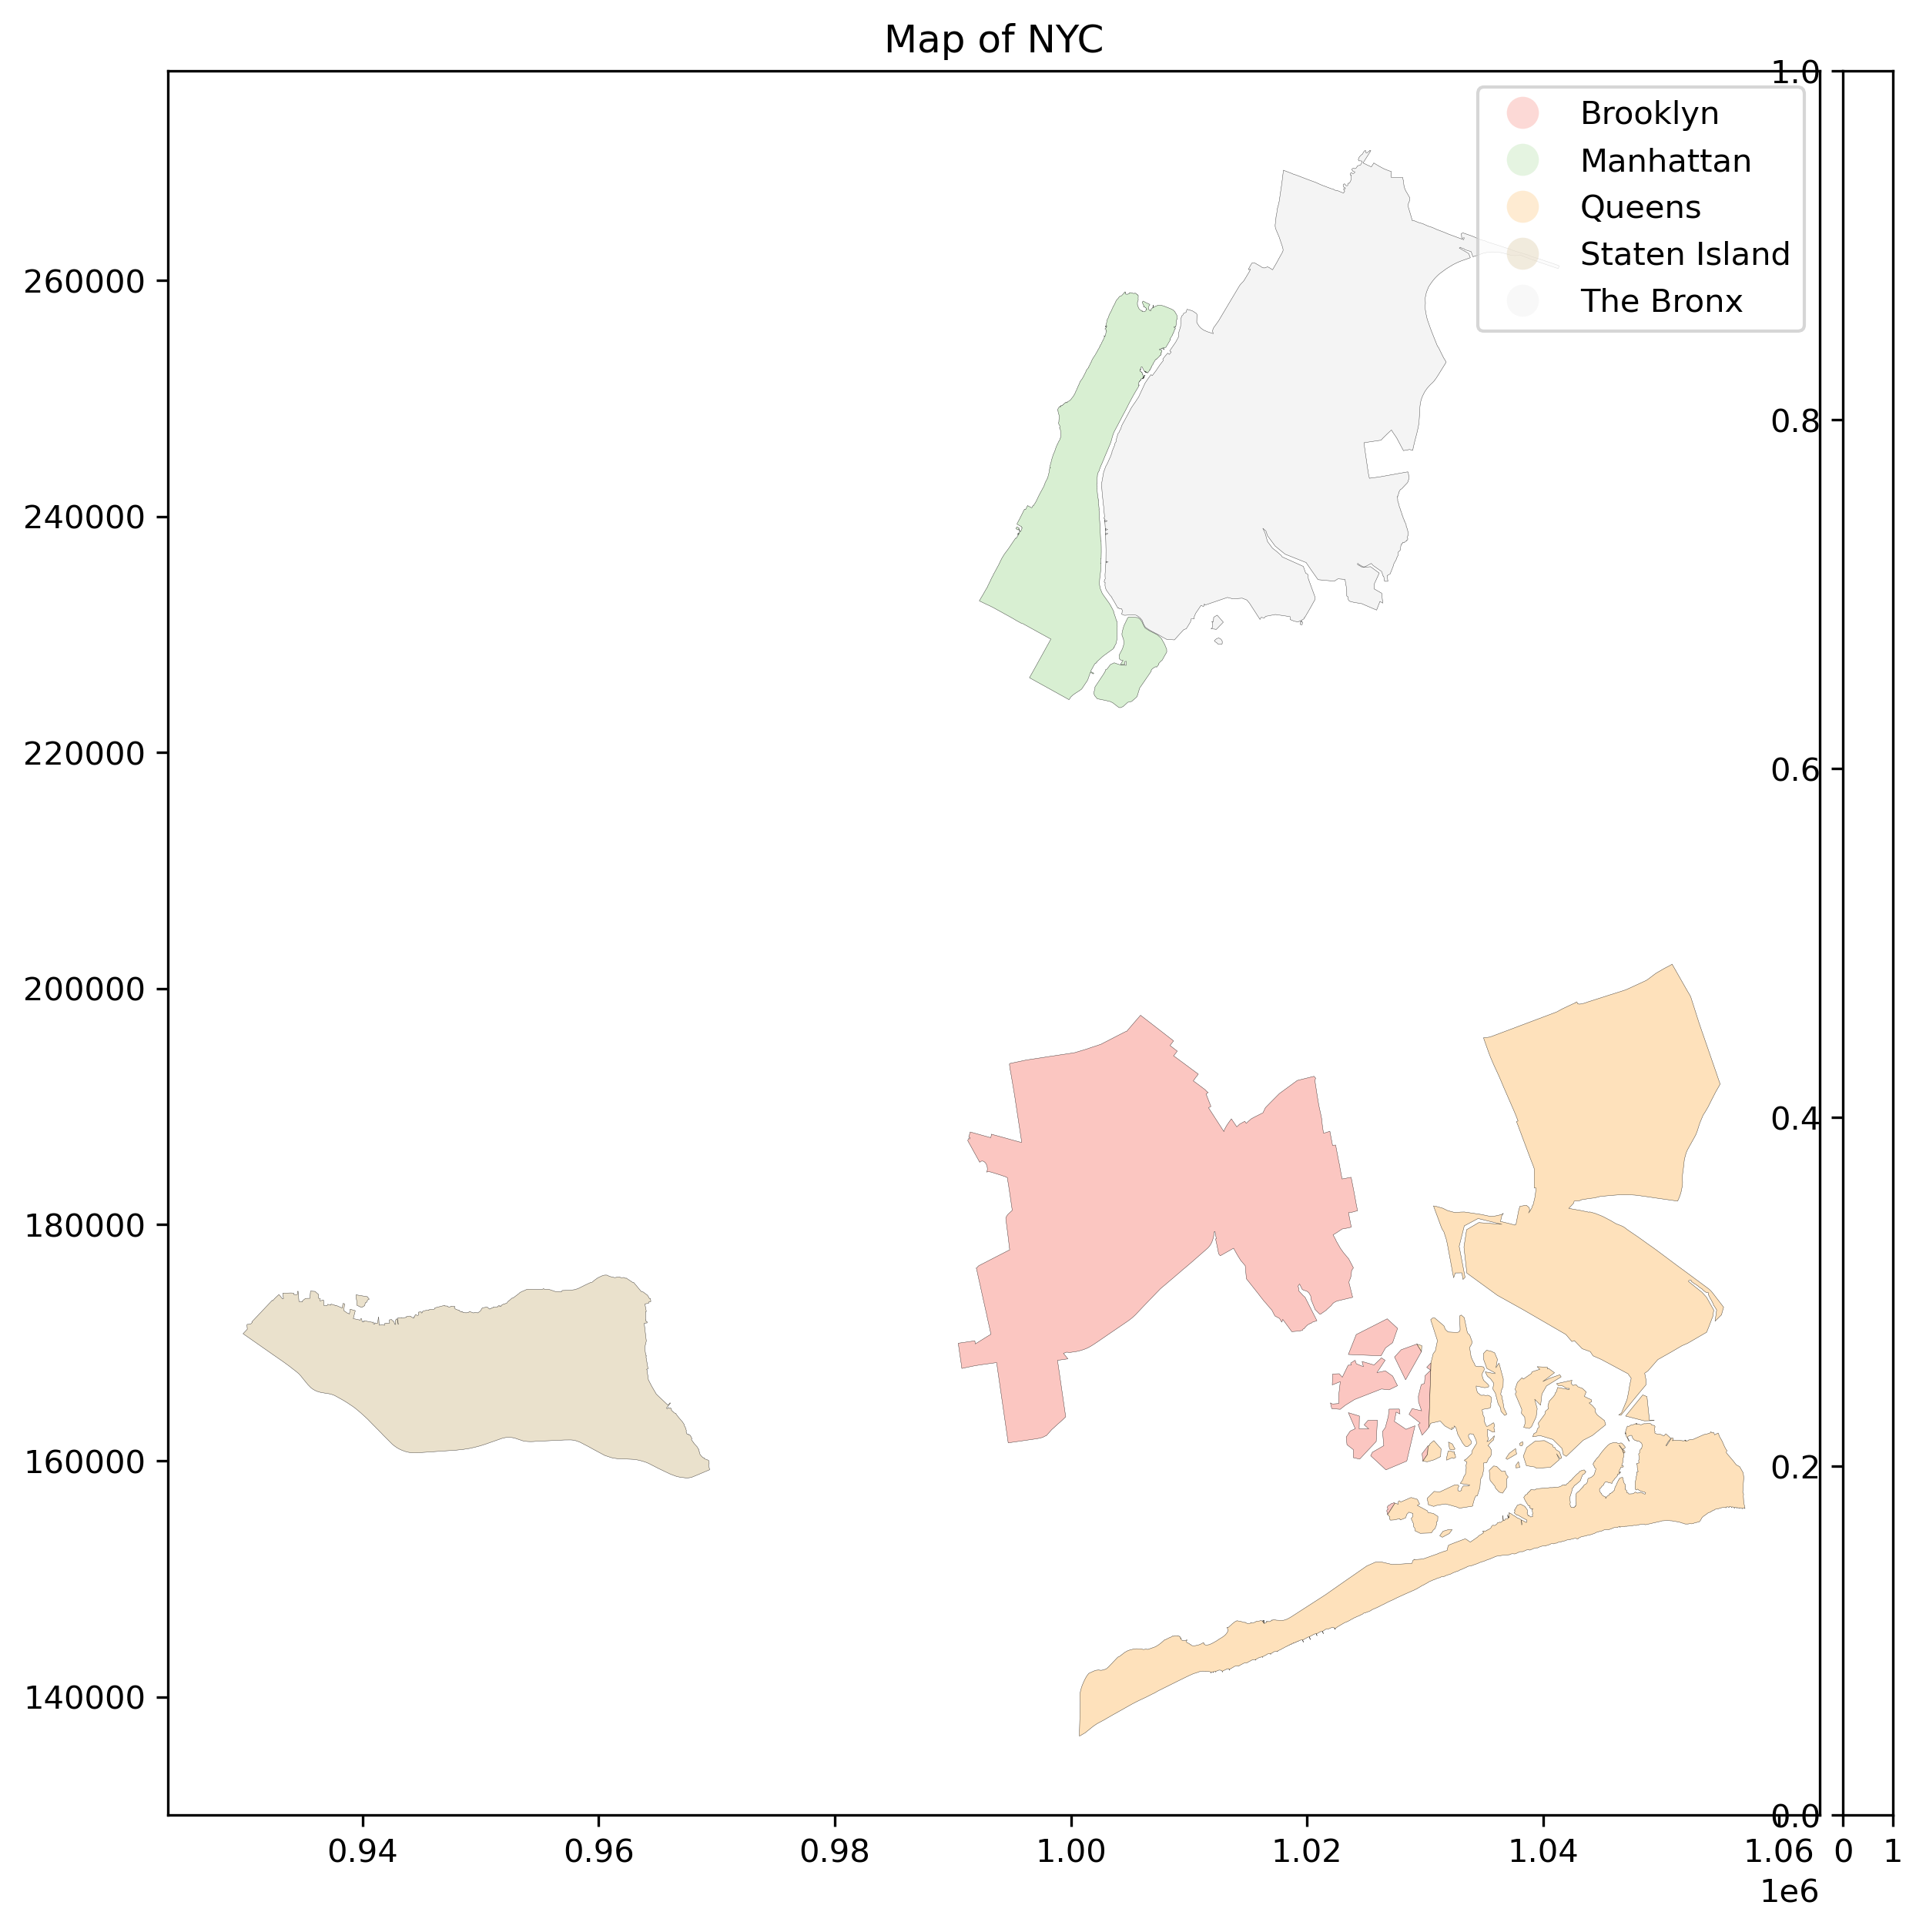

In [270]:
# Map of NYC
f, ax = plt.subplots(1, 1, figsize=(12, 10), sharex=True, sharey=True, dpi=300)
gdf_states_ny.plot('FIRST_BO_1', ax=ax, alpha=0.5, cmap='Pastel1', edgecolor='k', legend=True, linewidth=0.1)
plt.title('Map of NYC')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.1)

gdf_states_ny.plot('FIRST_BO_1', ax=ax, alpha=0.5, cmap='Pastel1', edgecolor='k', cax=cax, linewidth=0.1)
plt.show()


- Example 2 - using data from the official shapefiles maps from the US Census Bureau (same offical web to download the US states data), this time select Block group -> Select Utah
- link: https://www.census.gov/cgi-bin/geo/shapefiles/index.php

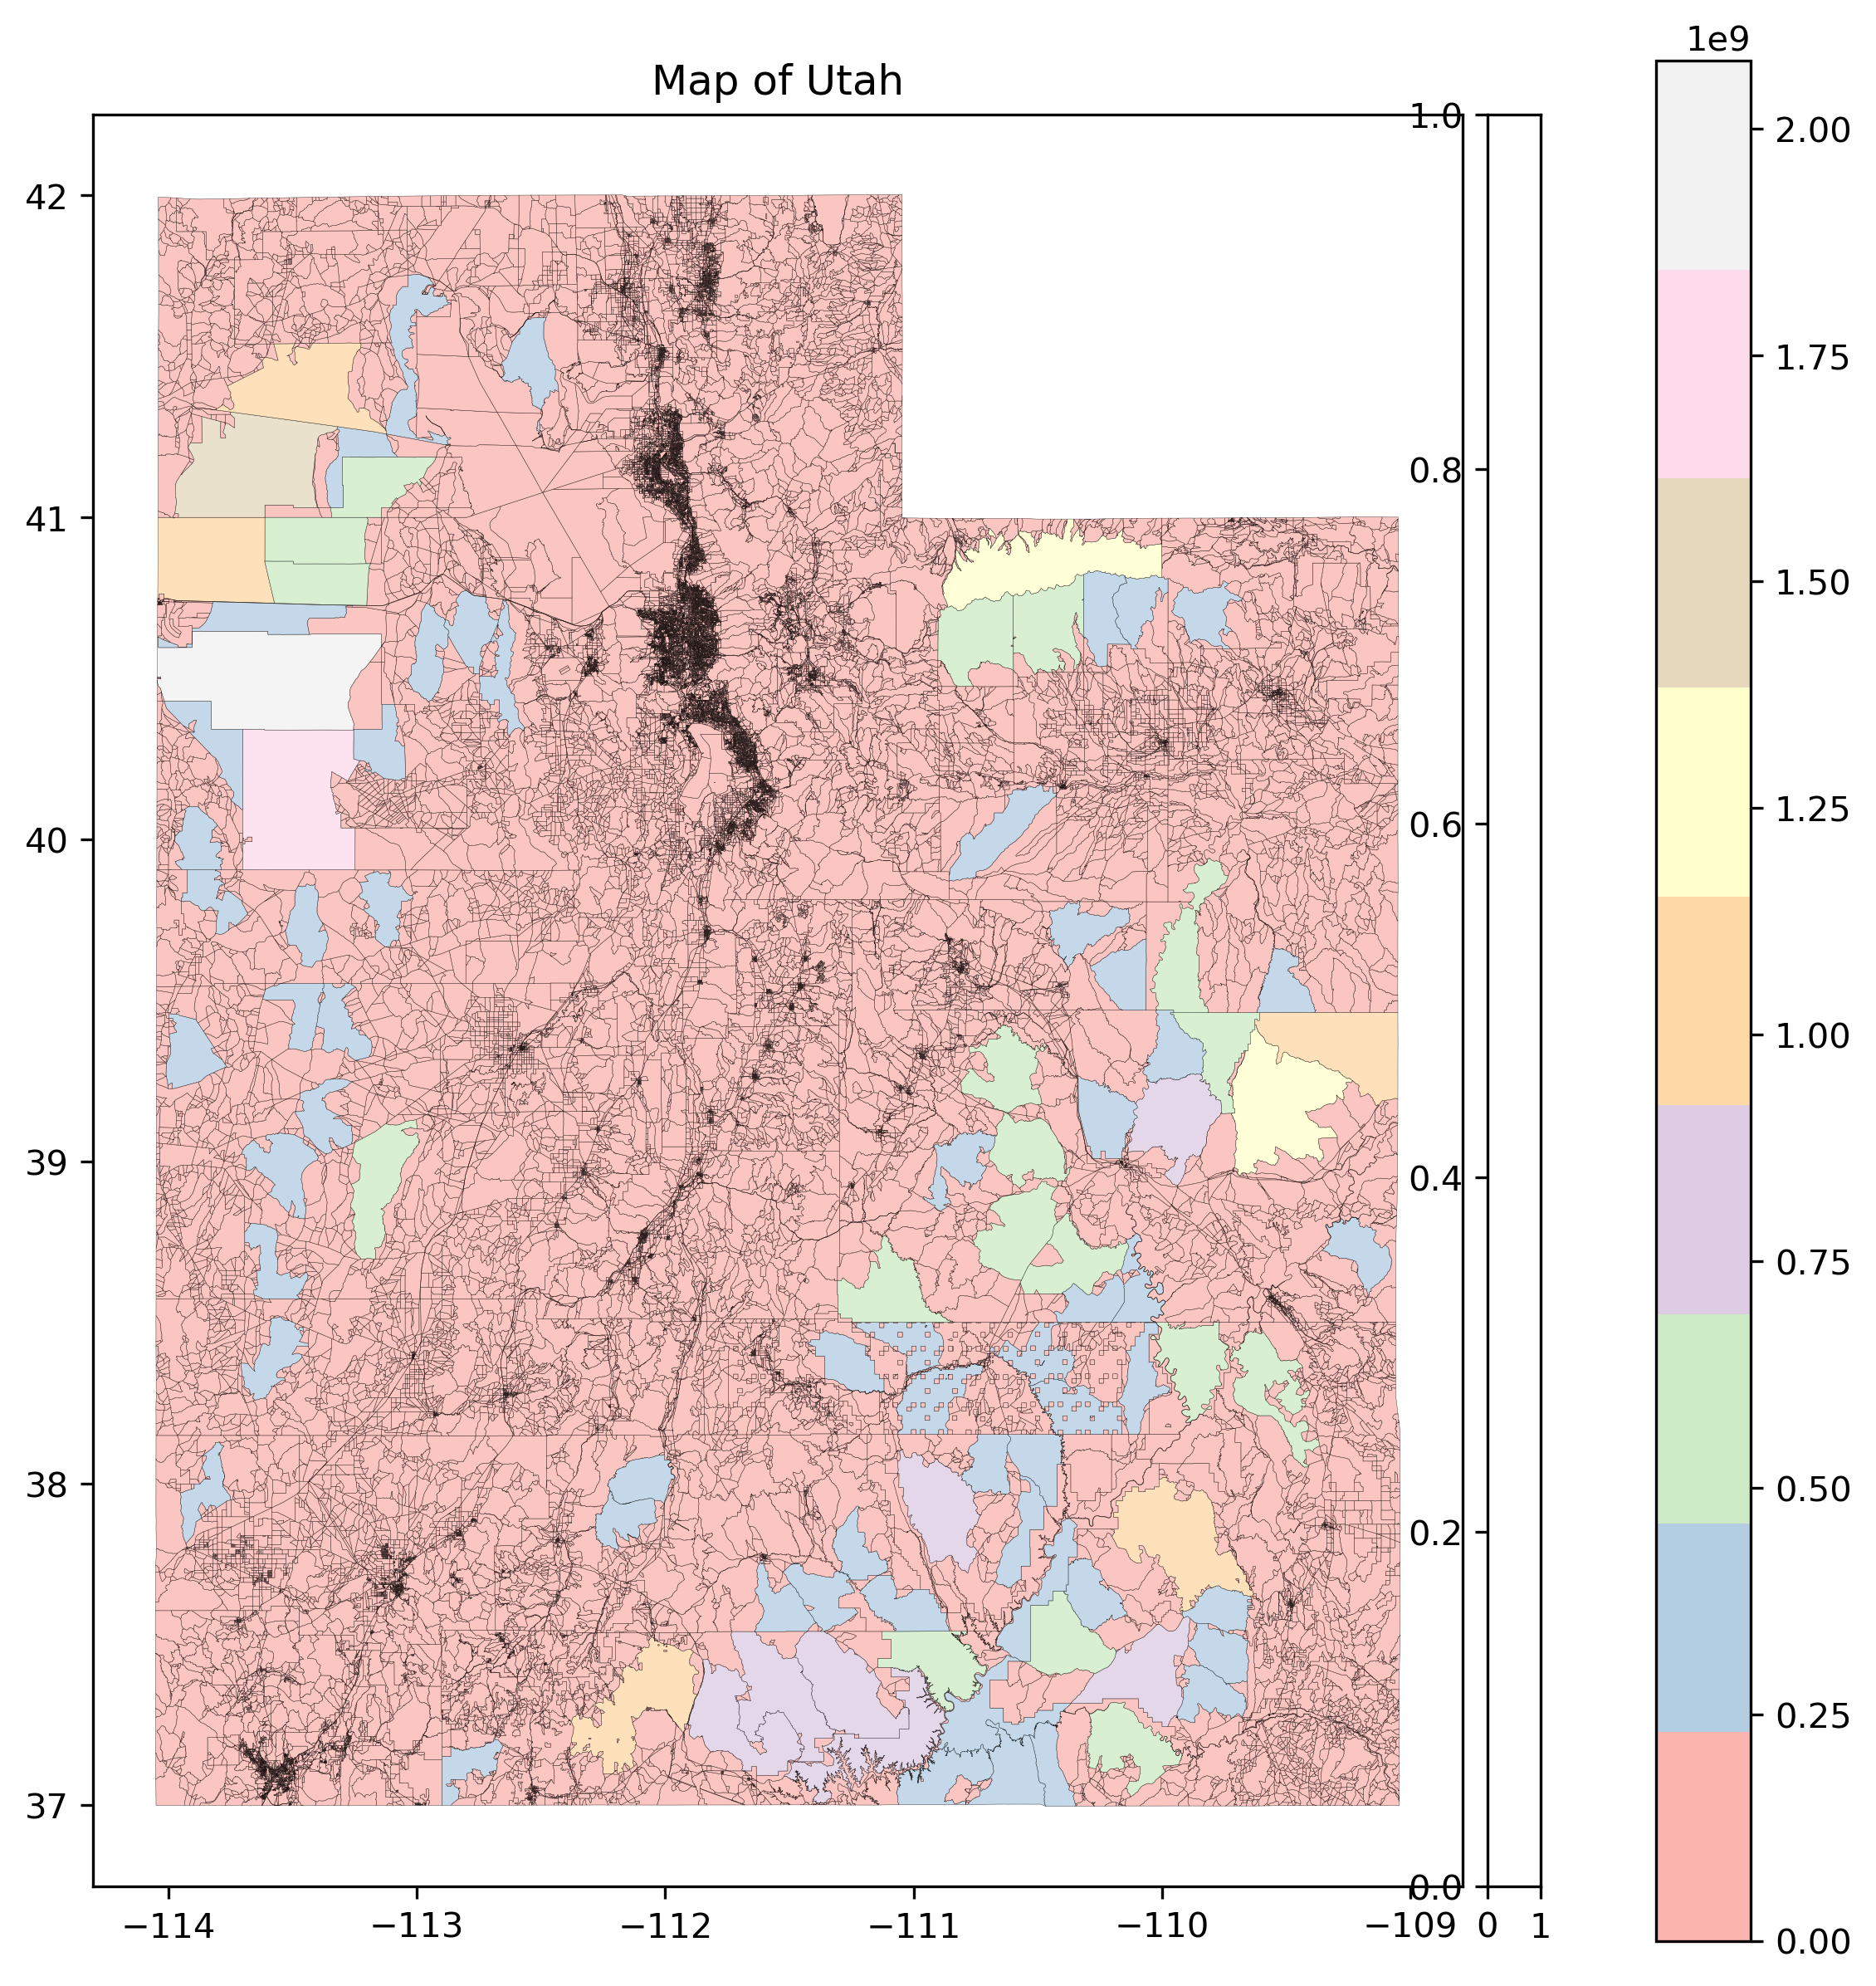

In [267]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

shapefile_path = 'tl_2022_49_tabblock20/tl_2022_49_tabblock20.shp'
gdf_states_ut = gpd.read_file(shapefile_path)

f, ax = plt.subplots(1, 1, figsize=(12, 10), sharex=True, sharey=True, dpi=300)
gdf_states_ut.plot('ALAND20', ax=ax, alpha=0.5, cmap='Pastel1', edgecolor='k', legend=True, linewidth=0.1)
plt.title('Map of Utah')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.1)

gdf_states_ut.plot('ALAND20', ax=ax, alpha=0.5, cmap='Pastel1', edgecolor='k', cax=cax, linewidth=0.1)
plt.show()


- Using Open Street Map API for further visualization

In [31]:
import geopandas as gpd
import osmnx as ox
import matplotlib.pyplot as plt

In [28]:
# Specify the name that is used to seach for the data
place_name = "Salt Lake City, Utah, USA"

# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(place_name)

# Check the data type
area

geometry  bbox_north  bbox_south  \
0  POLYGON ((-112.10139 40.82715, -112.10132 40.8...   40.853391   40.699926   

    bbox_east   bbox_west   place_id  osm_type  osm_id       lat         lon  \
0 -111.740484 -112.101392  315499582  relation  198770  40.75962 -111.886797   

      class            type  place_rank  importance addresstype  \
0  boundary  administrative          16    0.637243        city   

             name                                       display_name  
0  Salt Lake City  Salt Lake City, Salt Lake County, Utah, United...

In [29]:
# List key-value pairs for tags
tags = {'building': True}   

buildings = ox.geometries_from_place(place_name, tags)
buildings.head()

/var/folders/q5/_56gtjhj19s4q7xtbc4g0chc0000gn/T/ipykernel_13851/2857596332.py:4: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  buildings = ox.geometries_from_place(place_name, tags)


building   ele       gnis:Class gnis:County  \
element_type osmid                                                       
node         150941193          yes  1337  Populated Place   Salt Lake   
             150945663          yes  1325  Populated Place   Salt Lake   
             150948580          yes  1464  Populated Place   Salt Lake   
             150954906          yes  1288  Populated Place   Salt Lake   
             150954929  residential  1357  Populated Place   Salt Lake   

                       gnis:County_num gnis:ST_alpha gnis:ST_num  \
element_type osmid                                                 
node         150941193             035            UT          49   
             150945663             035            UT          49   
             150948580             035            UT          49   
             150954906             035            UT          49   
             150954929             035            UT          49   

                       gnis:feature_id                              name  \
element_type osmid                                                         
node         150941193         1449753                  Tara Condominium   
             150945663         1449754          Trevi Towers Condominium   
             150948580         1449779    Northpoint Estates Condominium   
             150954906         1449799        Villa Montaige Condominium   
             150954929         1454367  The Avenues Heritage Condominium   

                                           geometry  ... tower:type passports  \
element_type osmid                                   ...                        
node         150941193  POINT (-111.89322 40.77525)  ...        NaN       NaN   
             150945663  POINT (-111.89311 40.77462)  ...        NaN       NaN   
             150948580  POINT (-111.87954 40.78641)  ...        NaN       NaN   
             150954906  POINT (-111.93105 40.76022)  ...        NaN       NaN   
             150954929  POINT (-111.87124 40.77219)  ...        NaN       NaN   

                       payment:paypal area service:vehicle:painting  \
element_type osmid                                                    
node         150941193            NaN  NaN                      NaN   
             150945663            NaN  NaN                      NaN   
             150948580            NaN  NaN                      NaN   
             150954906            NaN  NaN                      NaN   
             150954929            NaN  NaN                      NaN   

                       substation construction:aeroway faculty ways type  
element_type osmid                                                        
node         150941193        NaN                  NaN     NaN  NaN  NaN  
             150945663        NaN                  NaN     NaN  NaN  NaN  
             150948580        NaN                  NaN     NaN  NaN  NaN  
             150954906        NaN                  NaN     NaN  NaN  NaN  
             150954929        NaN                  NaN     NaN  NaN  NaN  

[5 rows x 334 columns]

<Axes: >

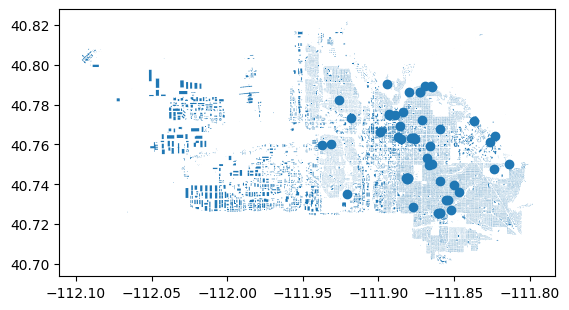

In [30]:
# Plot footprints 
buildings.plot()